# Trabajo Práctico 1 - Inferencia Estadística y Reconocimiento de Patrones



# REGRESION LOGISTICA ESTANDARIZADA


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

Exactitud en test: 0.6041666666666666

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.75      0.70       204
           6       0.55      0.64      0.59       192
           7       0.67      0.23      0.35        60
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.31      0.27      0.27       480
weighted avg       0.58      0.60      0.58       480

Accuracy medio CV (5 folds): 0.5810188087774295


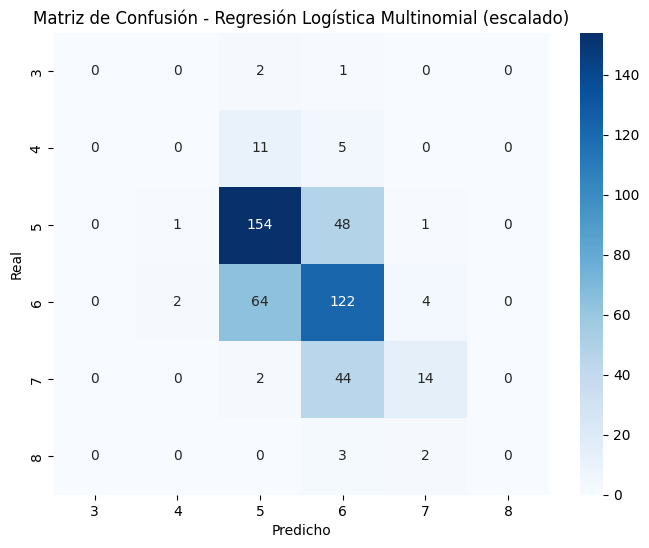

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Cargar el dataset
df = pd.read_csv("winequality-red.csv", sep=";")

# --- 2) Variables predictoras (X) y respuesta (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# --- 3) Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 4) Escalado (importante para regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 5) Modelo de regresión logística multinomial
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

# --- 6) Entrenamiento
log_reg.fit(X_train_scaled, y_train)

# --- 7) Predicciones
y_pred = log_reg.predict(X_test_scaled)

# --- 8) Evaluación
print("Exactitud en test:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# --- 10) Validación cruzada (accuracy promedio en 5 folds)
scores = cross_val_score(log_reg, scaler.fit_transform(X), y, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds):", scores.mean())

# --- 9) Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.sort(y.unique()), 
            yticklabels=np.sort(y.unique()))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial (escalado)")
plt.show()


# REGRESION LOGISTICA (ESTANDARIZADA Y BALANCEADA)

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Pyth

Exactitud en test (balanceado): 0.45208333333333334

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.04      0.33      0.07         3
           4       0.07      0.31      0.12        16
           5       0.71      0.58      0.64       204
           6       0.57      0.31      0.40       192
           7       0.38      0.52      0.44        60
           8       0.03      0.20      0.05         5

    accuracy                           0.45       480
   macro avg       0.30      0.38      0.29       480
weighted avg       0.58      0.45      0.49       480

Accuracy medio CV (5 folds, balanceado): 0.6076038272373351


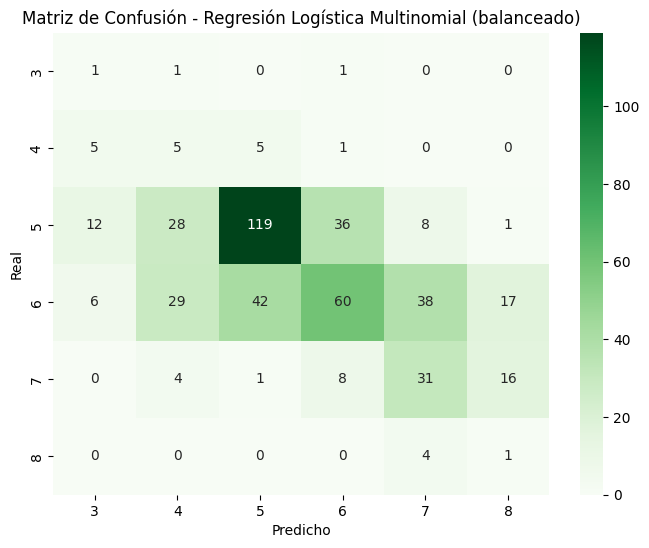

In [2]:
# Balanceo con RandomOverSampler (sobremuestreo)

from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Cargar y preparar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

# Modelo
log_reg_bal = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42)
log_reg_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = log_reg_bal.predict(X_test_scaled)

# Evaluación
print("Exactitud en test (balanceado):", accuracy_score(y_test, y_pred_bal))
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_bal))

# Validación cruzada (en todo X balanceado)
scores_bal = cross_val_score(log_reg_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_bal.mean())

# Matriz de confusión
cm_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial (balanceado)")
plt.show()


# KNN (ESTANDARIZADA)

Exactitud en test: 0.5854166666666667

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.64      0.71      0.67       204
           6       0.55      0.59      0.57       192
           7       0.50      0.38      0.43        60
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.28      0.28      0.28       480
weighted avg       0.55      0.59      0.57       480

Accuracy medio CV (5 folds): 0.525323275862069


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

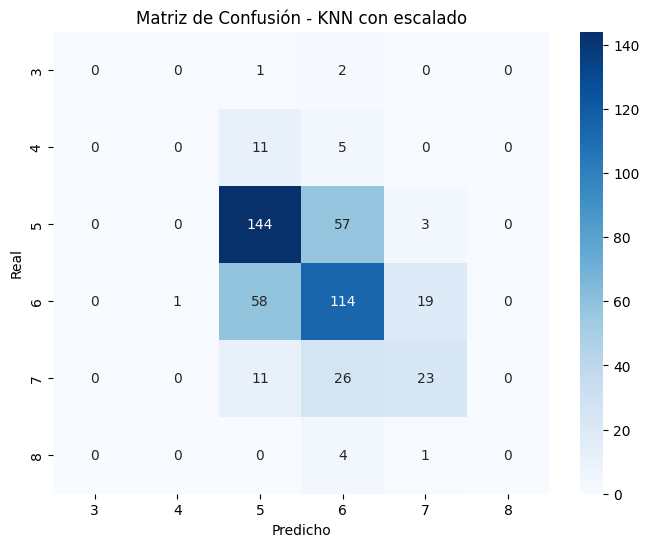

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo KNN con escalado
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Validación cruzada
scaler_cv = StandardScaler()
scores = cross_val_score(knn, scaler_cv.fit_transform(X), y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - KNN con escalado')
plt.show()

# KNN (ESTANDARIZADA Y BALANCEADA)

Exactitud en test (balanceado): 0.49375

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.18      0.38      0.24        16
           5       0.68      0.55      0.61       204
           6       0.55      0.40      0.46       192
           7       0.32      0.67      0.43        60
           8       0.09      0.20      0.12         5

    accuracy                           0.49       480
   macro avg       0.30      0.37      0.31       480
weighted avg       0.56      0.49      0.51       480

Accuracy medio CV (5 folds, balanceado): 0.8060807429917378


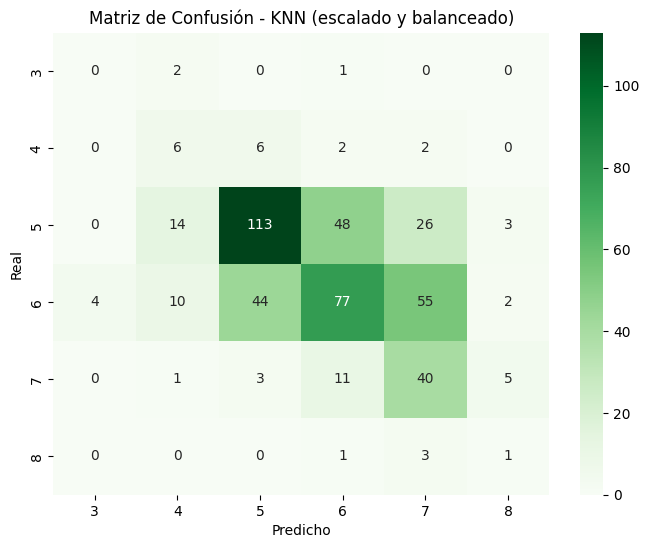

In [4]:
# Balanceo con RandomOverSampler (sobremuestreo)
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

# Modelo KNN (puedes ajustar n_neighbors según tu búsqueda óptima)
knn_bal = KNeighborsClassifier(n_neighbors=5)
knn_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = knn_bal.predict(X_test_scaled)

# Evaluación
print("Exactitud en test (balanceado):", accuracy_score(y_test, y_pred_bal))
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_bal))

# Validación cruzada (en todo X balanceado)
scores_bal = cross_val_score(knn_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_bal.mean())

# Matriz de confusión
cm_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN (escalado y balanceado)")
plt.show()


# BAYES INGENUO (ESTANDARIZADA)

Exactitud en test: 0.5541666666666667

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.12      0.33      0.18         3
           4       0.05      0.06      0.06        16
           5       0.66      0.63      0.65       204
           6       0.55      0.53      0.54       192
           7       0.53      0.55      0.54        60
           8       0.10      0.20      0.13         5

    accuracy                           0.55       480
   macro avg       0.34      0.38      0.35       480
weighted avg       0.57      0.55      0.56       480

Accuracy medio CV (5 folds): 0.5284913793103448


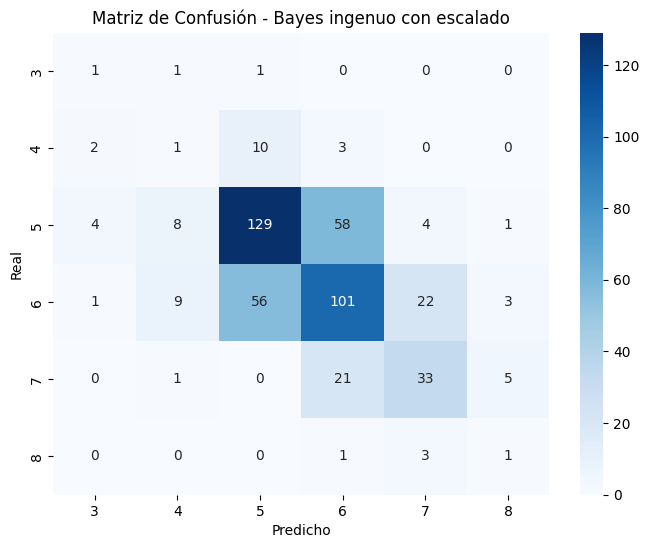

Reporte de clasificación (con escalado):
              precision    recall  f1-score   support

           3       0.12      0.33      0.18         3
           4       0.05      0.06      0.06        16
           5       0.66      0.63      0.65       204
           6       0.55      0.53      0.54       192
           7       0.53      0.55      0.54        60
           8       0.10      0.20      0.13         5

    accuracy                           0.55       480
   macro avg       0.34      0.38      0.35       480
weighted avg       0.57      0.55      0.56       480



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predicciones
y_pred = nb.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Cross-validation
scores = cross_val_score(nb, X, y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Bayes ingenuo con escalado')
plt.show()

# Reporte de clasificación
print('Reporte de clasificación (con escalado):')
print(classification_report(y_test, y_pred))

# bayes ingenuo (estandarizada y balanceada)

Exactitud en test (balanceado): 0.3375

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.01      0.33      0.02         3
           4       0.04      0.06      0.05        16
           5       0.67      0.42      0.52       204
           6       0.52      0.24      0.33       192
           7       0.29      0.42      0.34        60
           8       0.05      0.60      0.09         5

    accuracy                           0.34       480
   macro avg       0.26      0.35      0.22       480
weighted avg       0.53      0.34      0.40       480

Accuracy medio CV (5 folds, balanceado): 0.4524774527392328


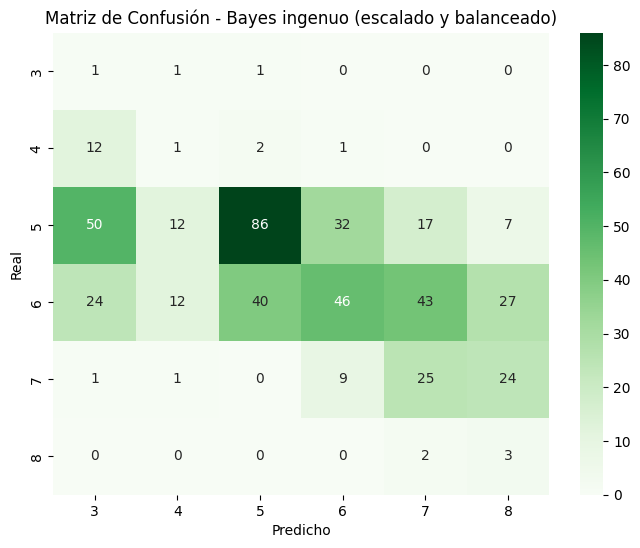

In [6]:
# Balanceo con RandomOverSampler (sobremuestreo)
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

# Modelo Naive Bayes
nb_bal = GaussianNB()
nb_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = nb_bal.predict(X_test_scaled)

# Evaluación
print("Exactitud en test (balanceado):", accuracy_score(y_test, y_pred_bal))
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_bal))

# Validación cruzada (en todo X balanceado)
scores_bal = cross_val_score(nb_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_bal.mean())

# Matriz de confusión
cm_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Bayes ingenuo (escalado y balanceado)")
plt.show()

# LDA (ESTANDARIZADA)

Exactitud en test: 0.5895833333333333

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.74      0.70       204
           6       0.55      0.58      0.56       192
           7       0.58      0.35      0.44        60
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.30      0.28      0.28       480
weighted avg       0.57      0.59      0.58       480

Accuracy medio CV (5 folds): 0.5728781347962382


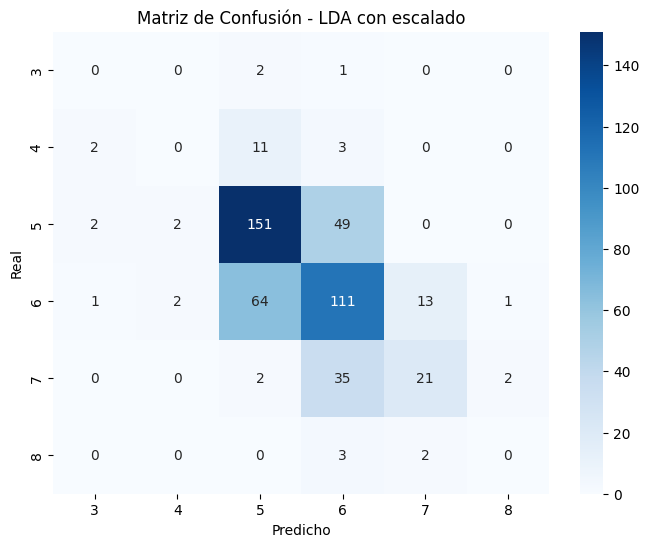

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo LDA con escalado
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred = lda.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Validación cruzada
scores = cross_val_score(lda, scaler.transform(X), y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - LDA con escalado')
plt.show()

# LDA (ESTANDARIZADA Y BALANCEADA)

LDA balanceado - Exactitud en test: 0.4395833333333333

Reporte de clasificación (LDA balanceado):
               precision    recall  f1-score   support

           3       0.05      0.33      0.09         3
           4       0.04      0.19      0.07        16
           5       0.70      0.56      0.62       204
           6       0.57      0.32      0.41       192
           7       0.38      0.50      0.43        60
           8       0.02      0.20      0.04         5

    accuracy                           0.44       480
   macro avg       0.29      0.35      0.28       480
weighted avg       0.57      0.44      0.49       480

Accuracy medio CV (5 folds, LDA balanceado): 0.5429612272544209


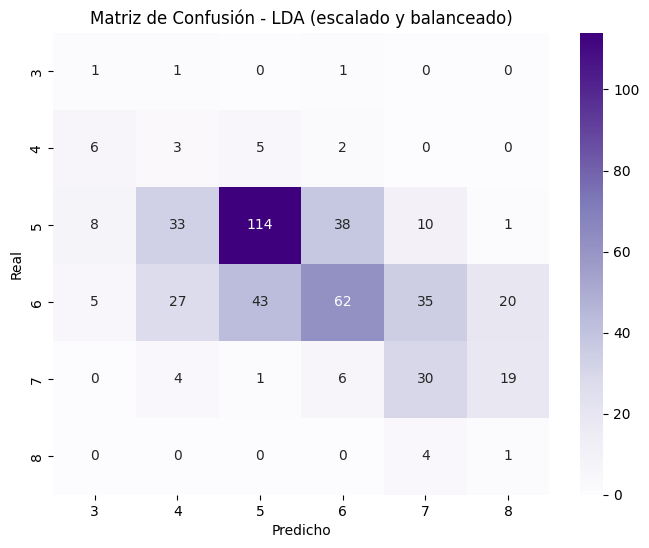

In [8]:
# LDA balanceado (escalado y balanceado)
from imblearn.over_sampling import RandomOverSampler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

lda_bal = LinearDiscriminantAnalysis()
lda_bal.fit(X_train_bal, y_train_bal)
y_pred_lda_bal = lda_bal.predict(X_test_scaled)
print("LDA balanceado - Exactitud en test:", accuracy_score(y_test, y_pred_lda_bal))
print("\nReporte de clasificación (LDA balanceado):\n", classification_report(y_test, y_pred_lda_bal))

scores_lda_bal = cross_val_score(lda_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, LDA balanceado):", scores_lda_bal.mean())

# Matriz de confusión
cm_lda_bal = confusion_matrix(y_test, y_pred_lda_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lda_bal, annot=True, fmt="d", cmap="Purples", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - LDA (escalado y balanceado)")
plt.show()

# QDA (ESTANDARIZADA)

Exactitud en test: 0.55625

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.13      0.12      0.13        16
           5       0.65      0.60      0.62       204
           6       0.52      0.60      0.56       192
           7       0.54      0.43      0.48        60
           8       0.14      0.20      0.17         5

    accuracy                           0.56       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.56      0.56      0.55       480

Accuracy medio CV (5 folds): 0.5272139498432602


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\M

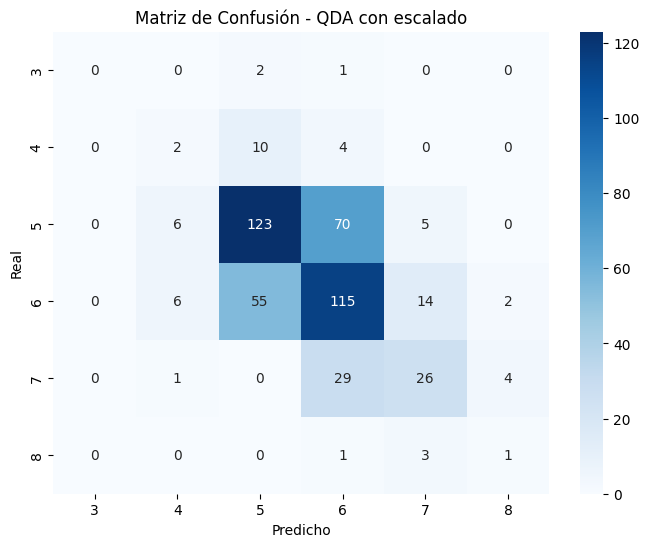

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo QDA con escalado
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)
y_pred = qda.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Validación cruzada
scores = cross_val_score(qda, scaler.transform(X), y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - QDA con escalado')
plt.show()

# QDA (ESTANDARIZADO Y BALANCEADO)

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\M

QDA balanceado - Exactitud en test: 0.5041666666666667

Reporte de clasificación (QDA balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.19      0.38      0.26        16
           5       0.68      0.56      0.61       204
           6       0.52      0.44      0.48       192
           7       0.34      0.58      0.43        60
           8       0.12      0.40      0.18         5

    accuracy                           0.50       480
   macro avg       0.31      0.39      0.33       480
weighted avg       0.55      0.50      0.52       480

Accuracy medio CV (5 folds, QDA balanceado): 0.6470850266661785


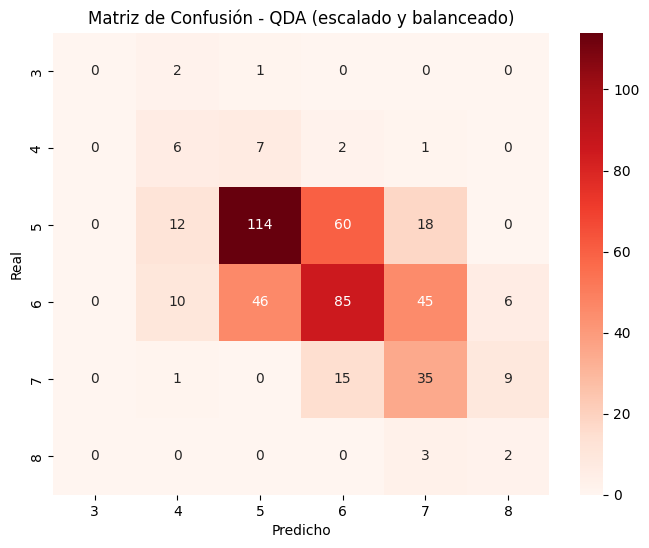

In [10]:
# QDA balanceado (escalado y balanceado)
from imblearn.over_sampling import RandomOverSampler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

qda_bal = QuadraticDiscriminantAnalysis()
qda_bal.fit(X_train_bal, y_train_bal)
y_pred_qda_bal = qda_bal.predict(X_test_scaled)
print("QDA balanceado - Exactitud en test:", accuracy_score(y_test, y_pred_qda_bal))
print("\nReporte de clasificación (QDA balanceado):\n", classification_report(y_test, y_pred_qda_bal))

scores_qda_bal = cross_val_score(qda_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, QDA balanceado):", scores_qda_bal.mean())

cm_qda_bal = confusion_matrix(y_test, y_pred_qda_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_qda_bal, annot=True, fmt="d", cmap="Reds", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - QDA (escalado y balanceado)")
plt.show()